# A Gentle Introduction to the Box-Jenkins Method

The Autoregressive Integrated Moving Average Model, or ARIMA for short is a standard statistical model for time series forecast and analysis. 
Along with its development, the authors Box and Jenkins also suggest a process for identifying, estimating, and checking models for a specific time series dataset. This process is now referred to as the Box-Jenkins Method. In this lesson, you will discover the Box-Jenkins Method and tips for using it on your time series forecasting problem. Specifically, you will learn:
- About the ARIMA process and how the 3 steps of the Box-Jenkins Method.
- Best practice heuristics for selecting the q, d, and p model configuration for an ARIMA
model.
- Evaluating models by looking for overfitting and residual errors as a diagnostic process.

### Autoregressive Integrated Moving Average Model
An ARIMA model is a class of statistical model for analyzing and forecasting time series data. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 

It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. 
Briefly, they are:

- **AR: Autoregression.** A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I: Integrated.** The use of differencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA: Moving Average.** A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. The parameters of the ARIMA model are defined as follows:

- **p:** The number of lag observations included in the model, also called **the lag order**.

- **d:** The number of times that the raw observations are differenced, also called **the degree
of differencing**.

- **q:** The size of the moving average window, also called **the order of moving average**.

### Box-Jenkins Method
The Box-Jenkins method was proposed by George Box and Gwilym Jenkins in their seminal 1970 textbook Time Series Analysis: Forecasting and Control1. 

The approach starts with the assumption that the process that generated the time series can be approximated using an ARMA model if it is stationary or an ARIMA model if it is non-stationary. 

The 2016 5th edition of the textbook (Part Two, page 177) refers to the process as a stochastic model building and that it is an iterative approach that consists of the following 3 steps:

1. **Identification.** Use the data and all related information to help select a sub-class of model that may best summarize the data.

2. **Estimation.** Use the data to train the parameters of the model (i.e. the coefficients).

3. **Diagnostic Checking.** Evaluate the fitted model in the context of the available data and check for areas where the model may be improved.

It is an iterative process, so that as new information is gained during diagnostics, you can circle back to step 1 and incorporate that into new model classes. Let’s take a look at these steps in more detail.

## Identification
The identification step is further broken down into: Assess whether the time series is stationary, and if not, how many differences are required to make it stationary. Identify the parameters of an ARMA model for the data.

## Differencing
Below are some tips during identification.
- **Unit Root Tests.** Use unit root statistical tests on the time series to determine whether or not it is stationary. Repeat after each round of differencing.
- **Avoid over differencing.** Differencing the time series more than is required can result in the addition of extra serial correlation and additional complexity.

## Configuring AR and MA
Two diagnostic plots can be used to help choose the p and q parameters of the ARMA or ARIMA. They are:
- **Autocorrelation Function (ACF).** The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
- **Partial Autocorrelation Function (PACF).** The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% confidence intervals as horizontal lines. Bars that cross these confidence intervals are therefore more significant and worth noting. Some useful patterns you may observe on these plots are:
- The model is AR if the ACF trails off after a lag and has a hard cut-off in the PACF after a lag. This lag is taken as the value for p.
- The model is MA if the PACF trails off after a lag and has a hard cut-off in the ACF after the lag. This lag value is taken as the value for q.
- The model is a mixo f AR and MA if both the AC Fand PACF trail off.

## Estimation

Estimation involves using numerical methods to minimize a loss or error term. I would recommend referring to a textbook for a deeper understanding of the optimization problem to be solved by ARMA and ARIMA models and optimization methods like Limited-memory BFGS used to solve it.

## Diagnostic Checking
The idea of diagnostic checking is to look for evidence that the model is not a good fit for the data. Two useful areas to investigate diagnostics are:
1. Overfitting.
The first check is to check whether the model overfits the data. Generally, this means that the model is more complex than it needs to be and captures random noise in the training data. 
This is a problem for time series forecasting because it negatively impacts the ability of the model to generalize, resulting in poor forecast performance on out-of-sample data. 
Careful attention must be paid to both in-sample and out-of-sample performance and this requires the careful design of a robust test harness for evaluating models.
2. Residual Errors.
Forecast residuals provide a great opportunity for diagnostics. A review of the distribution of errors can help tease out bias in the model. The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance. For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of errors to the expected distribution. A non-Gaussian distribution may suggest an opportunity for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in forecasts that may be correct.
Additionally, an ideal model would leave no temporal structure in the time series of forecast residuals. These can be checked by creating ACF and PACF plots of the residual error time series. The presence of serial correlation in the residual errors suggests further opportunity for using this information in the model.



# Autoregression Models for Forecasting

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems. 

## Autoregression
A regression model, such as linear regression, models an output value based on a linear combination of input values. For example:
$$yhat = b0 + (b1 × X1)$$

Where yhat is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an input value. This technique can be used on time series where input variables are taken as observations at previous time steps, called **lag variables**. 
For example, we can predict the value for the next time step (t+1) given the observations at the current (t and previous t-1). As a regression model, this would look as follows:

$$X(t + 1) = b0 + (b1 × X(t)) + (b2 × X(t − 1))$$

An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called **correlation**. 
If both variables change in the same direction (e.g. go up together or down together), this is called a **positive correlation**. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called **negative correlation**.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling. 

Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/552564214.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


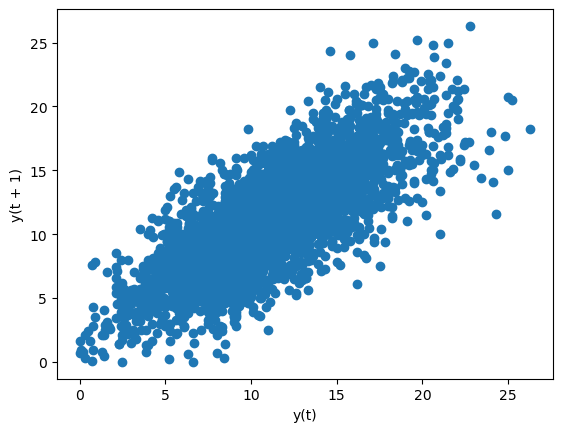

In [26]:
# lag plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
pyplot.show();

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation. This process could be repeated for any other lagged observation, such as if we wanted to review the relationship with the last 7 days or with the same day last month or last year. Another quick check that we can do is to directly calculate the correlation between the observation and the lag variable.

We can use a statistical test like the Pearson’s correlation coefficient. This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high
values above 0.5 or below -0.5 showing high correlation.

In [27]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/1097965206.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


## Autocorrelation Plots
We can plot the correlation coefficient for each lag variable. This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3971867705.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


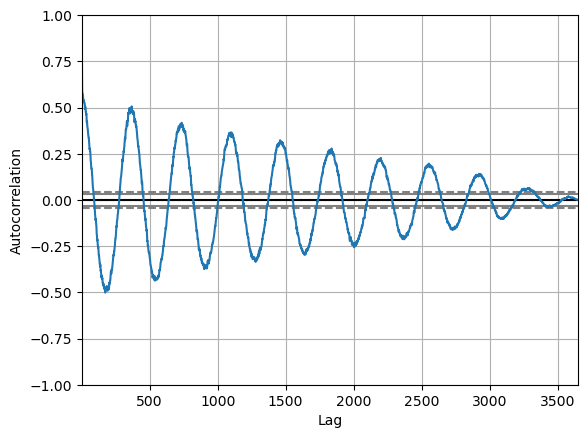

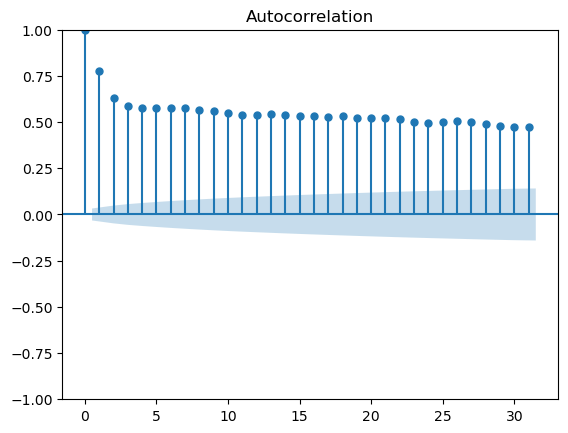

In [28]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
pyplot.show();
plot_acf(series, lags=31)
pyplot.show();

## Persistence Model
Let’s say that we want to develop a model to predict the last 7 days of minimum temperatures in the dataset given all prior observations. The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.

In [29]:
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
train[0:5], test[0:5]

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/366344707.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


(array([[20.7, 17.9],
        [17.9, 18.8],
        [18.8, 14.6],
        [14.6, 15.8],
        [15.8, 15.8]]),
 array([[10. , 12.9],
        [12.9, 14.6],
        [14.6, 14. ],
        [14. , 13.6],
        [13.6, 13.5]]))

In [30]:
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1.850


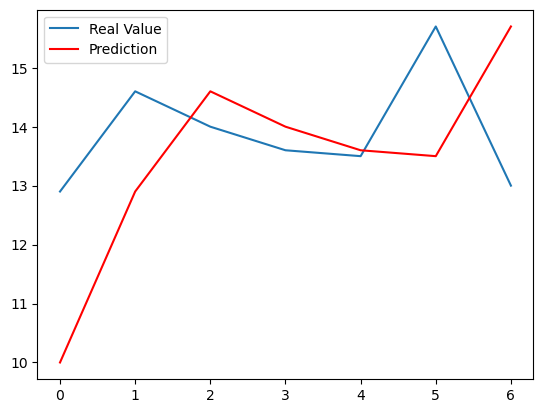

In [31]:
# plot predictions vs expected
from cProfile import label
from re import L


pyplot.plot(test_y  , label="Real Value")
pyplot.plot(predictions, color='red' , label="Prediction")
pyplot.legend()
pyplot.show();

## Autoregression Model
An autoregression model is a linear regression model that uses lagged variables as input variables. We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

In [32]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/963098868.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [33]:
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [34]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


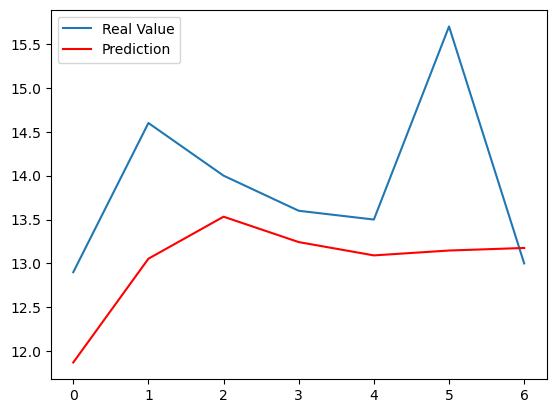

In [35]:
pyplot.plot(test_y  , label="Real Value")
pyplot.plot(predictions, color='red' , label="Prediction")
pyplot.legend()
pyplot.show();

## Autoregression Model
An autoregression model is a linear regression model that uses lagged variables as input variables. 
We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. 
Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the AR class.

We can use this model by first creating the model AR() and then calling fit() to train it on our dataset. This returns an ARResult object6. Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates 1 7-day forecast, which is different from the persistence example above.

In [36]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3541906549.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [37]:
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params

In [38]:
coef

array([ 5.57543506e-01,  5.88595221e-01, -9.08257090e-02,  4.82615092e-02,
        4.00650265e-02,  3.93020055e-02,  2.59463738e-02,  4.46675960e-02,
        1.27681498e-02,  3.74362239e-02, -8.11700276e-04,  4.79081949e-03,
        1.84731397e-02,  2.68908418e-02,  5.75906178e-04,  2.48096415e-02,
        7.40316579e-03,  9.91622149e-03,  3.41599123e-02, -9.11961877e-03,
        2.42127561e-02,  1.87870751e-02,  1.21841870e-02, -1.85534575e-02,
       -1.77162867e-03,  1.67319894e-02,  1.97615668e-02,  9.83245087e-03,
        6.22710723e-03, -1.37732255e-03])

In [39]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000


In [40]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1.204


The Statsmodels API does not make it easy to update the model as new observations become available. 
One way would be to re-train the AR model each day as new observations become available, and that may be a valid approach, if not computationally expensive. 
An alternative would be to use the learned coefficients and manually make predictions. 
This requires that the history of 29 prior observations be kept and that the coefficients be retrieved from the model and used in the regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t to t-n. We simply need to use them in the right order on the history of observations, as follows:

$$yhat = b0 + (b1 × X1) + (b2 × X2) . . . (bn × Xn)$$

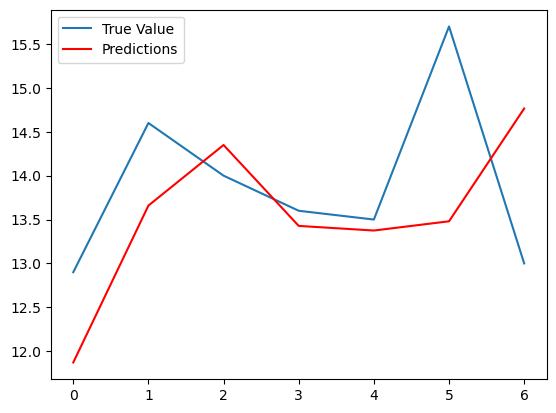

In [41]:
# plot
pyplot.plot(test , label="True Value")
pyplot.plot(predictions, color='red' , label="Predictions")
pyplot.legend()
pyplot.show()

# Moving Average Models for Forecasting


The residual errors from forecasts on a time series provide another source of information that we can model. Residual errors themselves form a time series that can have temporal structure. A simple autoregression model of this structure can be used to predict the forecast error, which in turn can be used to correct forecasts. This type of model is called a moving average model, the same name but very different from moving average smoothing.

In [42]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 9.151
      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3813080336.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


## Autoregression of Residual Error
We can model the residual error time series using an autoregression model. This is a linear regression model that creates a weighted linear sum of lagged residual error terms. For example:
$$error(t + 1) = b0 + (b1 × error(t)) + (b2 × error(t − 1)) . . . + (bn × error(t − n))$$

In [43]:
# autoregressive model of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/926022920.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [44]:
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AutoReg(train_resid, lags=15)
model_fit = model.fit()
print('Coef=%s' % (model_fit.params))

Coef=[ 0.10120699 -0.84940615 -0.77783609 -0.73345006 -0.68902061 -0.59270551
 -0.5376728  -0.42553356 -0.24861246 -0.19972102 -0.15954013 -0.11045476
 -0.14045572 -0.13299964 -0.12515801 -0.03615774]


we can step through the test dataset and for each time step we must:

1. Calculate the persistence prediction (t+1 = t-1).

2. Predict the residual error using the autoregression model.

The autoregression model requires the residual error of the 15 previous time steps. Therefore, we must keep these values handy.



In [45]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/1656963266.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


predicted error=1.155523, expected error=9.000000
predicted error=-7.108809, expected error=-10.000000
predicted error=3.007486, expected error=3.000000
predicted error=-0.756446, expected error=-6.000000
predicted error=5.511163, expected error=30.000000
predicted error=-19.991264, expected error=-28.000000
predicted error=4.842429, expected error=2.000000
predicted error=3.050883, expected error=9.000000
predicted error=-5.141585, expected error=-7.000000
predicted error=1.161119, expected error=1.000000
predicted error=-0.241928, expected error=-9.000000
predicted error=9.159826, expected error=21.000000
predicted error=-7.117974, expected error=-13.000000
predicted error=1.182992, expected error=-2.000000
predicted error=2.769363, expected error=11.000000
predicted error=-4.959337, expected error=-11.000000
predicted error=2.566233, expected error=-8.000000
predicted error=9.084498, expected error=6.000000
predicted error=3.020899, expected error=16.000000
predicted error=-6.542098

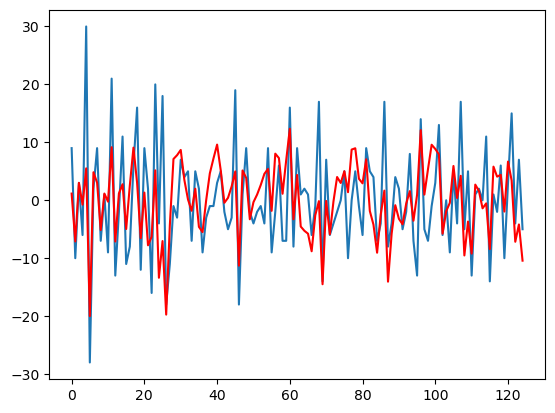

In [46]:
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	expected_error.append(error)
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	predictions.append(pred_error)
	history.append(error)
	print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

## Correct Predictions with a Model of Residual Errors
A model of forecast residual error is interesting, but it can also be useful to make better predictions.

With a good estimate of forecast error at a time step, we can make better predictions.

For example, we can add the expected forecast error to a prediction to correct it and in turn improve the skill of the model.

$$improved forecast = forecast + estimated error$$

Let’s make this concrete with an example.

Let’s say that the expected value for a time step is 10. The model predicts 8 and estimates the error to be 3. The improved forecast would be:

$$improved forecast = forecast + estimated error$$
- improved forecast = 8 + 3
- improved forecast = 11

This takes the actual forecast error from 2 units to 1 unit.

### correct the prediction
$$yhat = yhat + pred_error$$

predicted=43.155523, expected=51.000000
predicted=43.891191, expected=41.000000
predicted=44.007486, expected=44.000000
predicted=43.243554, expected=38.000000
predicted=43.511163, expected=68.000000
predicted=48.008736, expected=40.000000
predicted=44.842429, expected=42.000000
predicted=45.050883, expected=51.000000
predicted=45.858415, expected=44.000000
predicted=45.161119, expected=45.000000
predicted=44.758072, expected=36.000000
predicted=45.159826, expected=57.000000
predicted=49.882026, expected=44.000000
predicted=45.182992, expected=42.000000
predicted=44.769363, expected=53.000000
predicted=48.040663, expected=42.000000
predicted=44.566233, expected=34.000000
predicted=43.084498, expected=40.000000
predicted=43.020899, expected=56.000000
predicted=49.457902, expected=44.000000
predicted=45.328116, expected=53.000000
predicted=45.225588, expected=55.000000
predicted=48.705924, expected=39.000000
predicted=44.166344, expected=59.000000
predicted=45.621871, expected=55.000000


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/4236836249.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


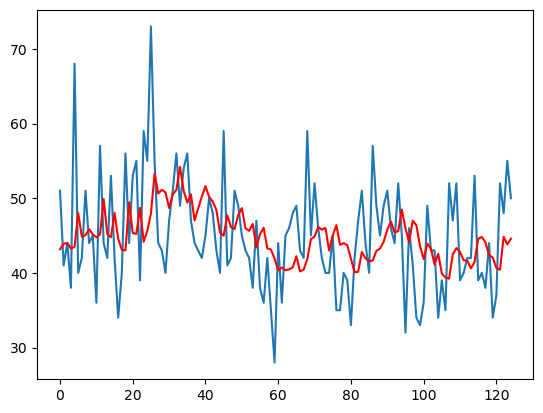

In [47]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
window = 15
model = AutoReg(train_resid, lags=15)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show();

# ARIMA Model for Forecasting

## ARIMA with Python
The Statsmodels library provides the capability to fit an ARIMA model. An ARIMA model can be created using the Statsmodels library as follows:
1. Define the model by calling ARIMA()1 and passing in the p, d, and q parameters. 
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function3 and specifying the index of
the time or times to be predicted.


In [48]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3910225234.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3910225234.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Mon, 24 Oct 2022   AIC                            408.969
Time:                        14:37:00   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

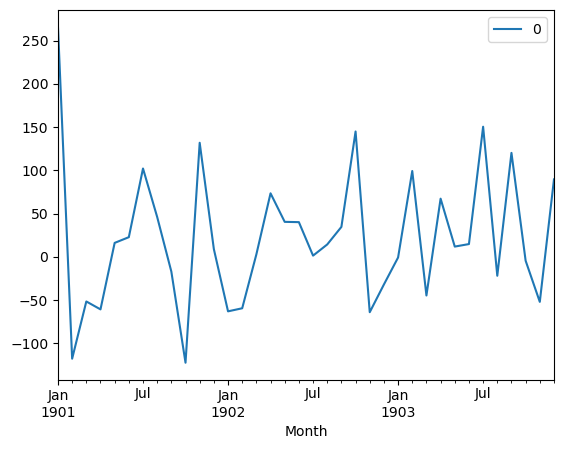

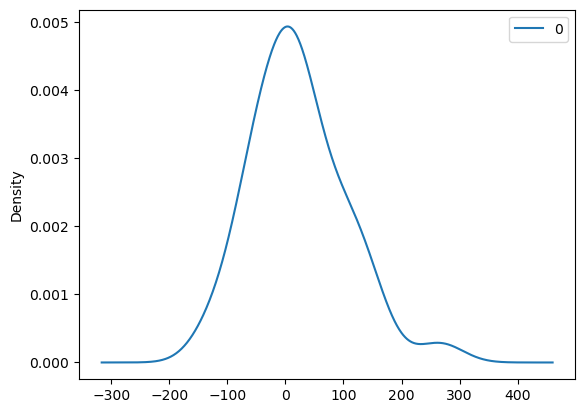

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [49]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

### Rolling Forecast ARIMA Model
The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.

We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0 when configuring the model). This can be specified by setting the typ argument to the value ‘levels’: typ=’levels’.

Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model.

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.



predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000


/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/459413195.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/459413195.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


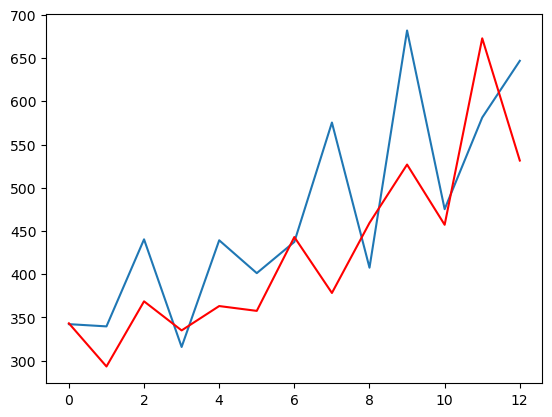

In [50]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Configuring an ARIMA Model
The classical approach for fitting an ARIMA model is to follow the Box-Jenkins Methodology.

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

1. Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.
2. Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.
3. Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.

The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).

# Autocorrelation and Partial Autocorrelation
Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting.

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/3889885413.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


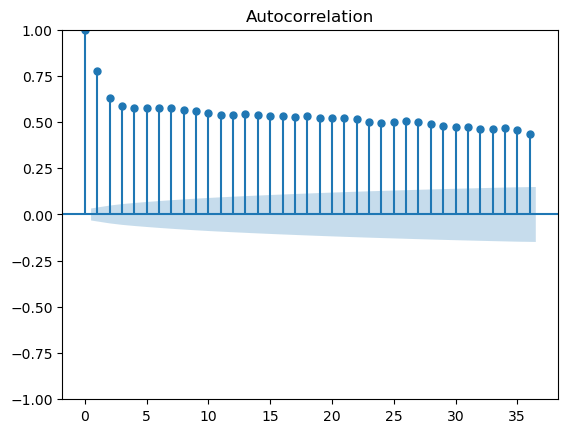

In [53]:
# ACF plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_acf(series)
pyplot.show()

Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.

By default, all lag values are printed, which makes the plot noisy. We can limit the number
of lags on the x-axis to 50 by setting the lags argument.

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/706555043.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,


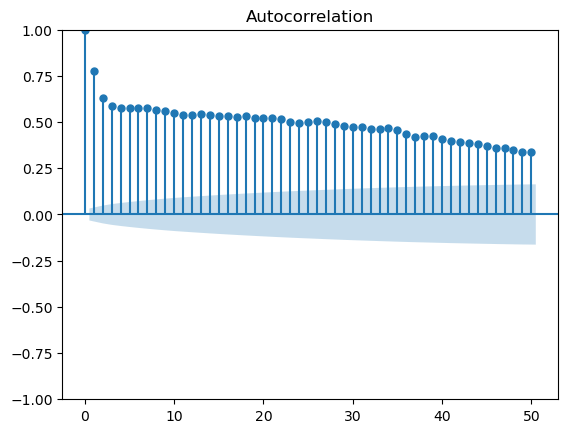

In [54]:
# zoomed-in ACF plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
plot_acf(series, lags=50)
pyplot.show()


## Partial Autocorrelation Function
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.
The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

/var/folders/gy/ggsrtsh527x0w4bhcr8s0z140000gn/T/ipykernel_2248/2366186633.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
/Users/parsanemati/Library/r-miniconda-arm64/envs/tensorflow/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


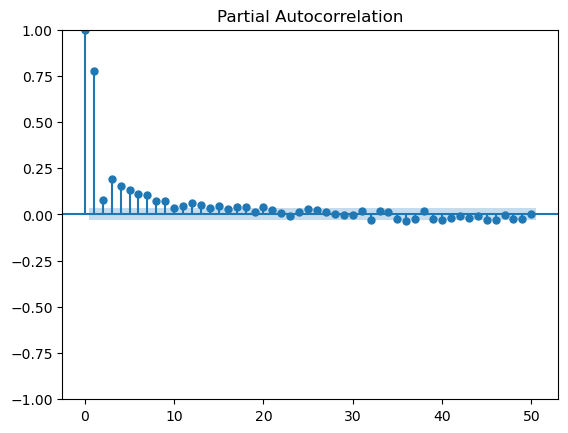

In [55]:
# PACF plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plot_pacf(series, lags=50)
pyplot.show()

## Intuition for ACF and PACF Plots

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story. We can use the intuition for ACF and PACF above to explore some thought experiments.


### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

# Grid Search ARIMA Model Hyperparameters

The ARIMA model for time series analysis and forecasting can be tricky to configure. There are 3 parameters that require estimation by iterative trial and error from reviewing diagnostic plots and using 40-year-old heuristic rules. We can automate the process of evaluating a large number of hyperparameters for the ARIMA model by using a grid search procedure. 

### Grid Searching Method
Diagnostic plots of the time series can be used along with heuristic rules to determine the hyperparameters of the ARIMA model. These are good in most, but perhaps not all, situations. We can automate the process of training and evaluating ARIMA models on different combinations of model hyperparameters. In machine learning this is called a grid search or model tuning. In this tutorial, we will develop a method to grid search ARIMA hyperparameters for a one-step rolling forecast. The approach is broken down into two parts:
1. Evaluate an ARIMA model.
2. Evaluate sets of ARIMA parameters.

### Evaluate ARIMA Model
We can evaluate an ARIMA model by preparing it on a training dataset and evaluating predictions on a test dataset. This approach involves the following steps:
1. Split the dataset into training and test sets. 
2. Walk the time steps in the test dataset.
    - (a) Train an ARIMA model. 
    - (b) Make a one-step prediction.
    - (c) Store prediction; get and store actual observation.
3. Calculate error score for predictions compared to expected values.

### Iterate ARIMA Parameters
Evaluating a suite of parameters is relatively straightforward. The user must specify a grid of p, d, and q ARIMA parameters to iterate. A model is created for each parameter and its performance evaluated by calling the evaluate arima model() function described in the previous section. The function must keep track of the lowest error score observed and the configuration that caused it. This can be summarized at the end of the function with a print to standard out.

We can implement this function called evaluate models() as a series of four loops. There are two additional considerations. The first is to ensure the input data are floating point values (as opposed to integers or strings), as this can cause the ARIMA procedure to fail. Second, the Statsmodels ARIMA procedure internally uses numerical optimization procedures to find a set of coefficients for the model. These procedures can fail, which in turn can throw an exception. We must catch these exceptions and skip those configurations that cause a problem. This happens more often then you would think. Additionally, it is recommended that warnings be ignored for
this code to avoid a lot of noise from running the procedure. 


In [61]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.644
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.787
ARIMA(1, 0, 2) RMSE=77.081
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.689
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.497
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.847
ARIMA(2, 2, 2) RMSE=80.808
ARIMA(4, 0, 0) RMSE=100.974
ARIMA(4, 0, 1) RMSE=101.515
ARIMA(4, 0, 2) RMSE=97.454
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.819
ARIMA(4, 1, 2) RMSE=84.205
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.140
ARIMA(6, 0, 0) 

In [63]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.189
ARIMA(0, 0, 1) RMSE=7.884
ARIMA(0, 0, 2) RMSE=7.771
ARIMA(0, 1, 0) RMSE=9.151
ARIMA(0, 1, 1) RMSE=7.427
ARIMA(0, 1, 2) RMSE=7.352
ARIMA(0, 2, 0) RMSE=15.670
ARIMA(0, 2, 1) RMSE=9.167
ARIMA(0, 2, 2) RMSE=7.456
ARIMA(1, 0, 0) RMSE=7.802
ARIMA(1, 0, 1) RMSE=7.568
ARIMA(1, 0, 2) RMSE=7.551
ARIMA(1, 1, 0) RMSE=8.106
ARIMA(1, 1, 1) RMSE=7.340
ARIMA(1, 1, 2) RMSE=7.329
ARIMA(1, 2, 0) RMSE=11.968
ARIMA(1, 2, 1) RMSE=8.120
ARIMA(1, 2, 2) RMSE=7.408
ARIMA(2, 0, 0) RMSE=7.697
ARIMA(2, 0, 1) RMSE=7.538
ARIMA(2, 1, 0) RMSE=7.700
ARIMA(2, 1, 1) RMSE=7.332
ARIMA(2, 1, 2) RMSE=7.356
ARIMA(2, 2, 0) RMSE=10.355
ARIMA(2, 2, 1) RMSE=7.714
ARIMA(4, 0, 0) RMSE=7.693
ARIMA(4, 0, 1) RMSE=7.507
ARIMA(4, 0, 2) RMSE=10.678
ARIMA(4, 1, 0) RMSE=7.565
ARIMA(4, 1, 1) RMSE=7.396
ARIMA(4, 1, 2) RMSE=7.322
ARIMA(4, 2, 0) RMSE=8.940
ARIMA(4, 2, 1) RMSE=7.577
ARIMA(6, 0, 0) RMSE=7.666
ARIMA(6, 0, 1) RMSE=8.604
ARIMA(6, 1, 0) RMSE=7.281
ARIMA(6, 1, 1) RMSE=7.340
ARIMA(6, 1, 2) RMSE=7.433
ARIMA(6,

### Extensions
The grid search method used in this tutorial is simple and can easily be extended. This section lists some ideas to extend the approach you may wish to explore.
- **Seed Grid.** The classical diagnostic tools of ACF and PACF plots can still be used with the results used to seed the grid of ARIMA parameters to search.
- **Alternate Measures.** The search seeks to optimize the out-of-sample root mean squared error. This could be changed to another out-of-sample statistic, an in-sample statistic, such as AIC or BIC, or some combination of the two. You can choose a metric that is most meaningful on your project.
- **Residual Diagnostics.** Statistics can automatically be calculated on the residual forecast errors to provide an additional indication of the quality of the fit. Examples include statistical tests for whether the distribution of residuals is Gaussian and whether there is an autocorrelation in the residuals.
- **Update Model.** The ARIMA model is created from scratch for each one-step forecast. With careful inspection of the API, it may be possible to update the internal data of the model with new observations rather than recreating it from scratch.
- **Preconditions.** The ARIMA model can make assumptions about the time series dataset, such as normality and stationarity. These could be checked and a warning raised for a given of a dataset prior to a given model being trained.

# Save Models and Make Predictions
Selecting a time series forecasting model is just the beginning. Using the chosen model in practice can pose challenges, including data transformations and storing the model parameters on disk. 

## Process for Making a Prediction
A lot is written about how to tune specific time series forecasting models, but little help is given to how to use a model to make predictions. Once you can build and tune forecast models for your data, the process of making a prediction involves the following steps:
1. **Model Selection.** This is where you choose a model and gather evidence and support to defend the decision.
2. **Model Finalization.** The chosen model is trained on all available data and saved to file for later use.
3. **Forecasting.** The saved model is loaded and used to make a forecast.
4. **Model Update.** Elements of the model are updated in the presence of new observations.



### Select Time Series Forecast Model




In [68]:
# fit an AR model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(series.values)
# fit model
model = AutoReg(X, lags=6)
model_fit = model.fit()
# save model to file
model_fit.save('./data/ar_model.pkl')
# save the differenced dataset
numpy.save('./data/ar_data.npy', X)
# save the last ob
numpy.save('./data/ar_obs.npy', [series.values[-1]])

### load the AR model from file


In [69]:
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
loaded = AutoRegResults.load('./data/ar_model.pkl')
print(loaded.params)
data = numpy.load('./data/ar_data.npy')
last_ob = numpy.load('./data/ar_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[50]


In [70]:
# fit an AR model and manually save coefficients to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# load dataset
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = difference(series.values)
# fit model
window_size = 6
model = AutoReg(X, lags=window_size)
model_fit = model.fit()
# save coefficients
coef = model_fit.params
numpy.save('./data/man_model.npy', coef)
# save lag
lag = X[-window_size:]
numpy.save('./data/man_data.npy', lag)
# save the last ob
numpy.save('./data/man_obs.npy', [series.values[-1]])

In [71]:

# load the manually saved model from file
import numpy
coef = numpy.load('./data/man_model.npy')
print(coef)
lag = numpy.load('./data/man_data.npy')
print(lag)
last_ob = numpy.load('./data/man_obs.npy')
print(last_ob)

[ 0.12129822 -0.75275857 -0.612367   -0.51097172 -0.4176669  -0.32116469
 -0.23412997]
[-10   3  15  -4   7  -5]
[50]


### Make a Time Series Forecast
Making a forecast involves loading the saved model and estimating the observation at the next time step. If the ARResults object was serialized, we can use the predict() function to predict the next time period. The example below shows how the next time period can be predicted. The model, training data, and last observation are loaded from file.

In [73]:

# load a coefficients and from file and make a manual prediction
import numpy
 
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('./data/man_model.npy')
lag = numpy.load('./data/man_data.npy')
last_ob = numpy.load('./data/man_obs.npy')
# make prediction
prediction = predict(coef, lag)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 46.755211


### Update Forecast Model
Our work is not done.

Once the next real observation is made available, we must update the data associated with the model.

Specifically, we must update:

1. The differenced training dataset used as inputs to make the subsequent prediction.
2. The last observation, providing a context for the predicted differenced value.

In [74]:

# update the data for the manual model with a new obs
import numpy
# get real observation
observation = 48
# update and save differenced observation
lag = numpy.load('./data/man_data.npy')
last_ob = numpy.load('./data/man_obs.npy')
diffed = observation - last_ob[0]
lag = numpy.append(lag[1:], [diffed], axis=0)
numpy.save('./data/man_data.npy', lag)
# update and save real observation
last_ob[0] = observation
numpy.save('man_obs.npy', last_ob)

## Consider Storing All Observations
Generally, it is a good idea to keep track of all the observations.

This will allow you to:

1. Provide a context for further time series analysis to understand new changes in the data.
2. Train a new model in the future on the most recent data.
3. Back-test new and different models to see if performance can be improved.

For small applications, perhaps you could store the raw observations in a file alongside your model.

It may also be desirable to store the model coefficients and required lag data and last observation in plain text for easy review.

For larger applications, perhaps a database system could be used to store the observations.

# Forecast Confidence Intervals
Time series forecast models can both make predictions and provide a confidence interval for those predictions. Confidence intervals provide an upper and lower expectation for the real observation. These can be useful for assessing the range of real possible outcomes for a prediction and for better understanding the skill of the model In this tutorial, you will discover how to calculate and interpret confidence intervals for time series forecasts with Python.

The ARIMA implementation in the Statsmodels Python library can be used to fit an ARIMA model. It returns an ARIMAResults object. This object provides the forecast() function that can be used to make predictions about future time steps and default to predicting the value at the next time step after the end of the training data. Assuming we are predicting just the next time step, the forecast() method returns three values:
- **Forecast.** The forecasted value in the units of the training time series. 
- **Standard error.** The standard error for the model.
- **Confidence interval.** The 95% confidence interval for the forecast.

In [75]:
# summarize the confidence interval on an ARIMA forecast
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
# load dataset
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
# forecast
result = model_fit.get_forecast()
# summarize forecast and confidence intervals
print('Expected: %.3f' % result.predicted_mean)
print('Forecast: %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)
ci = result.conf_int(0.05)
print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

Expected: 45.149
Forecast: 50.000
Standard Error: 7.009
95% Interval: 31.413 to 58.886


## Interpreting the Confidence Interval
The forecast() function allows the confidence interval to be specified. The alpha argument on the forecast() function specifies the confidence level. It is set by default to alpha=0.05, which is a 95% confidence interval. This is a sensible and widely used confidence interval. An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range.
Put another way, the 95% confidence interval suggests that there is a high likelihood that the real observation will be within the range. In the above example, the forecast was 45.878. The 95% confidence interval suggested that the real observation was highly likely to fall within the range of values between 32.167 and 59.590. The real observation was 50.0 and was well within this range. We can tighten the range of likely values a few ways:
- We can ask for a range that is narrower but increases the statistical likelihood of a real observation falling outside of the range.
- We can develop a model that has more predictive power and in turn makes more accurate predictions.

Further, the confidence interval is also limited by the assumptions made by the model, such as the distribution of errors made by the model fit a Gaussian distribution with a zero mean value (e.g. white noise). Extending the example above, we can report our forecast with a few different commonly used confidence intervals of 80%, 90%, 95% and 99%. 

In [77]:
# summarize multiple confidence intervals on an ARIMA forecast
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
# load data
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split data into train and test setes
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
result = model_fit.get_forecast()
forecast = result.predicted_mean
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
	ci = result.conf_int(alpha=a)
	print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 45.149 between 36.167 and 54.131
90.0% Confidence Interval: 45.149 between 33.621 and 56.677
95.0% Confidence Interval: 45.149 between 31.413 and 58.886
99.0% Confidence Interval: 45.149 between 27.096 and 63.202


## Plotting the Confidence Interval
The confidence interval can be plotted directly. The ARIMAResults object provides the plot predict() function1 that can be used to make a forecast and plot the results show- ing recent observations, the forecast, and confidence interval. As with the forecast() function, the confidence interval can be configured by specifying the alpha argument. The default is 0.05
(95% confidence), which is a sensible default. The example below shows the same forecast from above plotted using this function.


In [97]:
# plot the confidence intervals for an ARIMA forecast
from pandas import read_csv
from matplotlib import pyplot
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
# load data
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model

model_fit = sm.tsa.ARIMA(train, order=(5,1,1)).fit()


In [113]:
test

array([50.], dtype=float32)

In [95]:
import statsmodels as sm
sm.__version__

'0.13.2'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


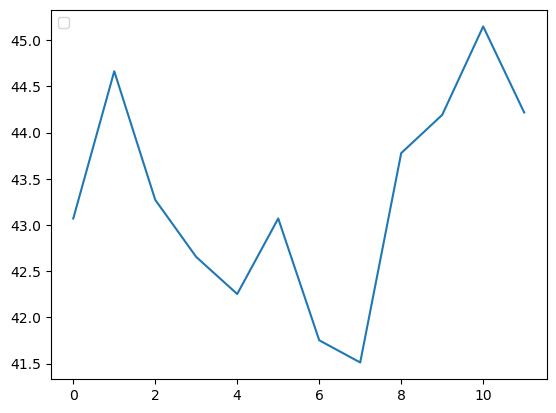

In [138]:
from statsmodels.graphics.tsaplots import plot_predict
x_predict=model_fit.predict(len(train)-10 , len(train)+1)
# plot some history and the forecast with confidence intervals
pyplot.plot(x_predict)
pyplot.legend(loc='upper left')
pyplot.show()

In [139]:
x_predict

array([43.07028319, 44.66449642, 43.27198294, 42.65377171, 42.25284197,
       43.07081951, 41.75192921, 41.51159111, 43.77831101, 44.19176304,
       45.14927515, 44.21807468])